In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing sklearn libraries
import sklearn
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import plotly.express as px

## Step 1: Reading and understanding data:

In [3]:
mall_df= pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#check the shape of dataset

mall_df.shape

(200, 5)

In [5]:
#check the info of dataset

mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#describe the dataframe

mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#check all the columns

mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Step 2: Data Cleaning

In [8]:
#checking null values

mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
#percentage null values

100*mall_df.isnull().sum()/len(mall_df)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [10]:
# checking duplicate values

mall_df.duplicated(subset = 'CustomerID').sum()

0

## Step 3: Exploratory Data Analysis (EDA)

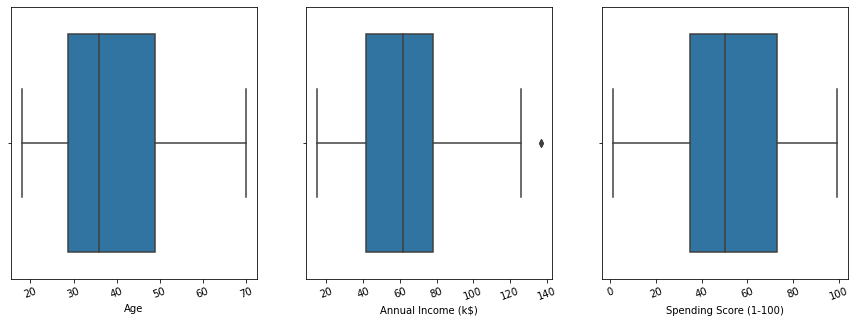

In [11]:
# Box Plot
plt.figure(figsize=(15, 5))
features = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in enumerate(features):
    ax = plt.subplot(1, 3, i[0]+1)
    sns.boxplot(mall_df[i[1]])
    plt.xticks(rotation=20)

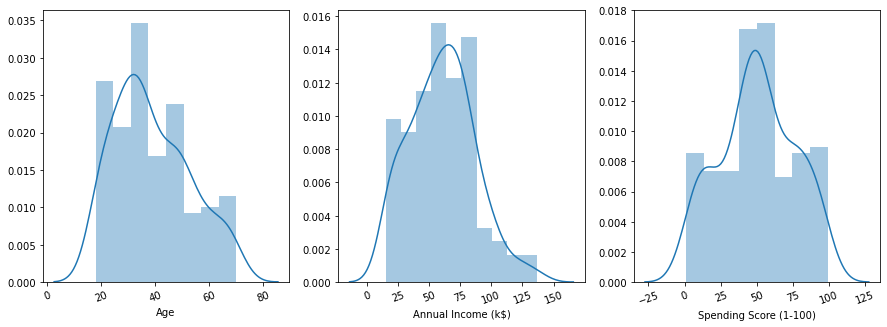

In [12]:
# distribution Plot
plt.figure(figsize=(15, 5))
features = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in enumerate(features):
    ax = plt.subplot(1, 3, i[0]+1)
    sns.distplot(mall_df[i[1]])
    plt.xticks(rotation=20)

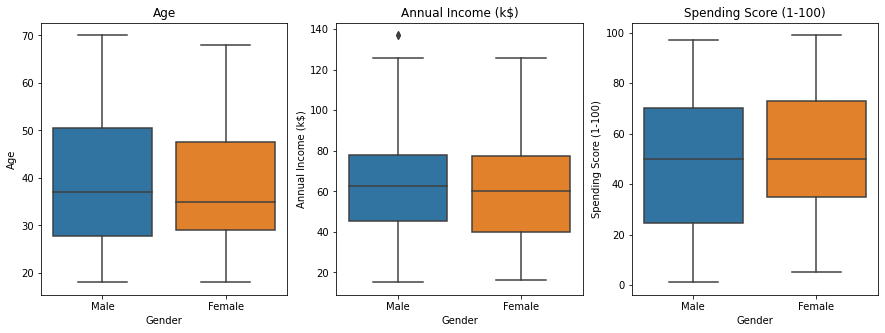

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.boxplot(x=mall_df.Gender, y=mall_df.Age)
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(x=mall_df.Gender, y=mall_df['Annual Income (k$)'])
plt.title('Annual Income (k$)')

plt.subplot(1,3,3)
sns.boxplot(x=mall_df.Gender, y=mall_df['Spending Score (1-100)'])
plt.title('Spending Score (1-100)')

plt.show()

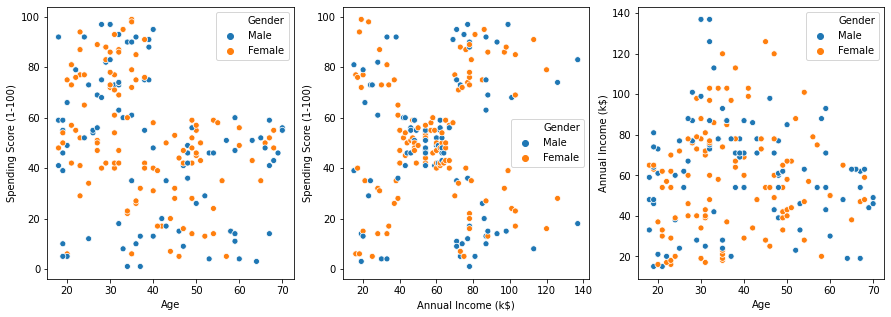

In [14]:
#scatter plot
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x=mall_df.Age,y=mall_df['Spending Score (1-100)'],hue=mall_df.Gender)

plt.subplot(1,3,3)
sns.scatterplot(x=mall_df.Age,y=mall_df['Annual Income (k$)'],hue=mall_df.Gender)

plt.subplot(1,3,2)
sns.scatterplot(x=mall_df['Annual Income (k$)'],y=mall_df['Spending Score (1-100)'],hue=mall_df.Gender)

## Step 4: Preparing Data

In [15]:
# creating a new df with only numerical column
mall_df1= mall_df.drop(['CustomerID', 'Gender'], axis=1)
mall_df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [16]:
#converting Gender Variable
#Male - 1
#Female -0
'''''variablelist =  ['Gender']

# Defining the map function
def binary_map(x):
    return x.map({'Male': 1, "Female": 0})

# Applying the function to the columns
mall_df1[variablelist] = mall_df1[variablelist].apply(binary_map)
mall_df1.head()'''

'\'\'variablelist =  [\'Gender\']\n\n# Defining the map function\ndef binary_map(x):\n    return x.map({\'Male\': 1, "Female": 0})\n\n# Applying the function to the columns\nmall_df1[variablelist] = mall_df1[variablelist].apply(binary_map)\nmall_df1.head()'

### Scaling Data

In [17]:
# initiate an object
scaler= StandardScaler()

# fit-transform data
mall_df1_scaled= scaler.fit_transform(mall_df1)
mall_df1_scaled.shape

(200, 3)

In [18]:
mall_df1_scaled= pd.DataFrame(mall_df1_scaled)
mall_df1_scaled.columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
mall_df1_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Step 5: Hopkins Statistics

In [19]:
# function hopkin statistics

from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.neighbors import NearestNeighbors
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
# Evaluate Hopkins Statistics
print('Hopkins statistics is: ', round(hopkins(mall_df1_scaled),2))

Hopkins statistics is:  0.77


## Step 6: Hierarchical Clustering

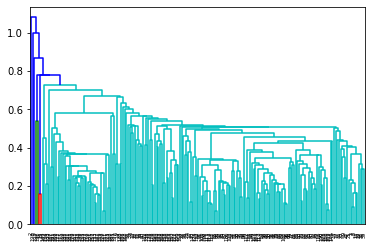

In [21]:
# single linkage
mergings = linkage(mall_df1_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

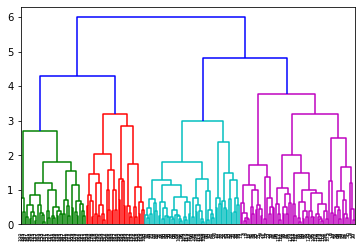

In [22]:
# complete linkage
mergings = linkage(mall_df1_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Using Complete linkage, we will consider clusters=4.

In [23]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [24]:
# assign the label
mall_df['cluster_labels'] = cluster_labels
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_labels
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [25]:
mall_df['cluster_labels'].value_counts()

0    69
1    57
2    39
3    35
Name: cluster_labels, dtype: int64

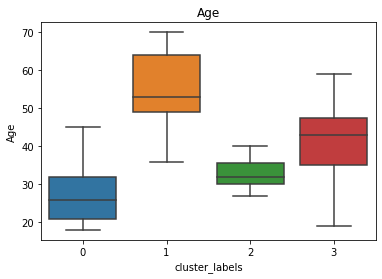

In [26]:
# plot
plt.title('Age')
sns.boxplot(x='cluster_labels', y='Age', data=mall_df)
plt.show()

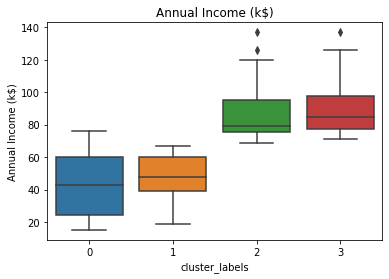

In [27]:
# plot
plt.title('Annual Income (k$)')
sns.boxplot(x='cluster_labels', y='Annual Income (k$)', data=mall_df)
plt.show()

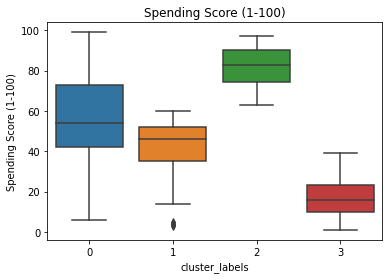

In [28]:
# plot
plt.title('Spending Score (1-100)')
sns.boxplot(x='cluster_labels', y='Spending Score (1-100)', data=mall_df)
plt.show()

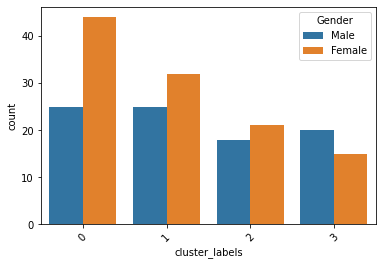

In [29]:
sns.countplot(data= mall_df , hue='Gender', x='cluster_labels').tick_params(axis='x', rotation = 45)

In [30]:
#scatter plot gdpp-child_mort

fig = px.scatter(mall_df, x="Spending Score (1-100)", y="Age", color="cluster_labels")
fig.show()

In [31]:
#scatter plot gdpp-child_mort

fig = px.scatter(mall_df, x="Spending Score (1-100)", y="Annual Income (k$)", color="cluster_labels")
fig.show()

In [32]:
#scatter plot gdpp-child_mort

fig = px.scatter(mall_df, x="Annual Income (k$)", y="Age", color="cluster_labels")
fig.show()

In [33]:
mall_grouped= mall_df.groupby('cluster_labels')

In [34]:
mall_grouped['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean().sort_values(by=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'], ascending=[True, True, True])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Age,Annual Income (k$),Spending Score (1-100)
cluster_labels,,,
0,27.275362,42.782609,56.376812
2,32.692308,86.538462,82.128205
3,41.685714,88.228571,17.285714
1,55.333333,47.315789,41.087719


## Conclusion:

* Cluster 0 belong to Low Income and High Spending score people who are mostly young aged.
* Cluster 1 belong to Average Income and Average Spending score people who are mostly old aged.
* Cluster 2 belong to High Income and High Spending score people who are at their 30s.
* Cluster 3 belongs to High Income and low spending score people who are mid aged.